В данном примере рассматривается синхронизация беспроводного сигнала как по времени, так и по частоте для коррекции смещения несущей частоты и выполнения выравнивания синхронизации на уровне символов и кадров.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math


num_symbols = 100
sps = 8
bits = np.random.randint(0, 2, num_symbols) # приводим к 0 или 1 
pulse_train = np.array([])


for bit in bits: # Для каждого бита в массиве bits выполняется создание массива pulse, заполненного нулями длиной sps
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 # Далее массив заполняется значениями bit*2-1 (1 или -1)
    pulse_train = np.concatenate((pulse_train, pulse)) # добавление сэмплов к сигналу

# Фильтр приподнятого косинуса
num_taps = 101
beta = 0.35
Ts = sps 
t = np.arange(-51, 52) 
h = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)


samples_1 = np.convolve(pulse_train, h)
plt.plot(samples_1, '.-')
plt.show()


# Создание и применение фильтра с дробной задержкой
delay = 0.4 # становка значения задержки в 0.4 сэмпла
N = 21 # number of taps
n = np.arange(-N//2, N//2) # ...-3,-2,-1,0,1,2,3...
h = np.sinc(n - delay) # calc filter taps
h *= np.hamming(N) # Применение оконной функции Хэмминга к фильтру, чтобы убедиться, что он затухает до 0 с обеих сторо
h /= np.sum(h) # Нормализация фильтра для достижения единичного усиления, чтобы не изменять амплитуду/мощность
samples_2 = np.convolve(samples_1, h) # добавления фильтра


In [14]:
# построение 
plt.subplot(2, 1, 1)
plt.plot(pulse_train, marker = 'o')
plt.title("Исходная последовательность символов")
plt.grid(True)


#построение отсчетов сигнала
plt.subplot(2, 1, 2)
plt.plot((samples_2), marker ='o')
plt.title("Формирование импульсов до синхронизации")
plt.grid(True)


На верхнем графике показаны исходные символы BPSK, т.е. 1 и -1. Между ними есть нули, так как мы используем 8 выборок на символ.

Следующий фрагмент код добавляет сдвиг частоты:
1. Устанавливаем значение переменной fs равным 1 миллиону (1e6) - предполагаем, что наша частота дискретизации составляет 1 МГц.
2. Устанавливаем значение переменной fo равным 13000 - моделируем смещение частоты.
3. Вычисляем период выборки и присваиваем его переменной Ts.
4. Создаем вектор времени `t`, используя `np.arange` от 0 до Ts, умноженного на длину образцов, с шагом Ts.
5. Выполняем сдвиг частоты образцов, умножая их на экспоненту со значением `1j*2*pi*fo*t`

In [16]:
# добавление сдвига частоты
fs = 1e6 
fo = 13000 
Ts = 1/fs 
t = np.arange(0, Ts*len(samples_1), Ts) 
samples = samples_1 * np.exp(1j*2*np.pi*fo*t) 
plt.plot(samples_1, '.-')
plt.plot(samples_2, '.-')
plt.title('Визуализация сдвига частоты')
plt.xlabel('Sample')
plt.ylabel('Real part of signal')

Text(0, 0.5, 'Real part of signal')

Представленный выше код был преобразован так чтобы можно было интерактивно менять параметр beta в фильтре приподнятого косинуса. Параметр Бетта в фильтре приподнятого косинуса отвечает за форму импульсов, которые формируются. Чем больше значение Бетта, тем более пологие и широкие импульсы будут сформированы.


In [98]:
from ipywidgets import interact

def pulse_shaping(beta=0.35):
    num_symbols = 100
    sps = 8
    bits = np.random.randint(0, 2, num_symbols)
    pulse_train = np.array([]) # Для каждого бита в массиве bits выполняется создание массива pulse, заполненного нулями длиной sps
    # Далее массив заполняется значениями bit*2-1 (1 или -1)
    # Объединяем массивы pulse_train и pulse в новый массив pulse_train
    for bit in bits:
        pulse = np.zeros(sps)
        pulse[0] = bit*2-1
        pulse_train = np.concatenate((pulse_train, pulse))

    num_taps = 101
   
    Ts = sps
    t = np.arange(-51, 52)
    h = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2) # Импульсный отклик фильтра

    samples = np.convolve(pulse_train, h)

    plt.plot(samples, '.-')
    plt.show()

interact(pulse_shaping, beta=(0.1, 2.0, 0.05))

interactive(children=(FloatSlider(value=0.35, description='beta', max=2.0, min=0.1, step=0.05), Output()), _do…

<function __main__.pulse_shaping(beta=0.35)>

Text(0, 0.5, 'Amplitude')

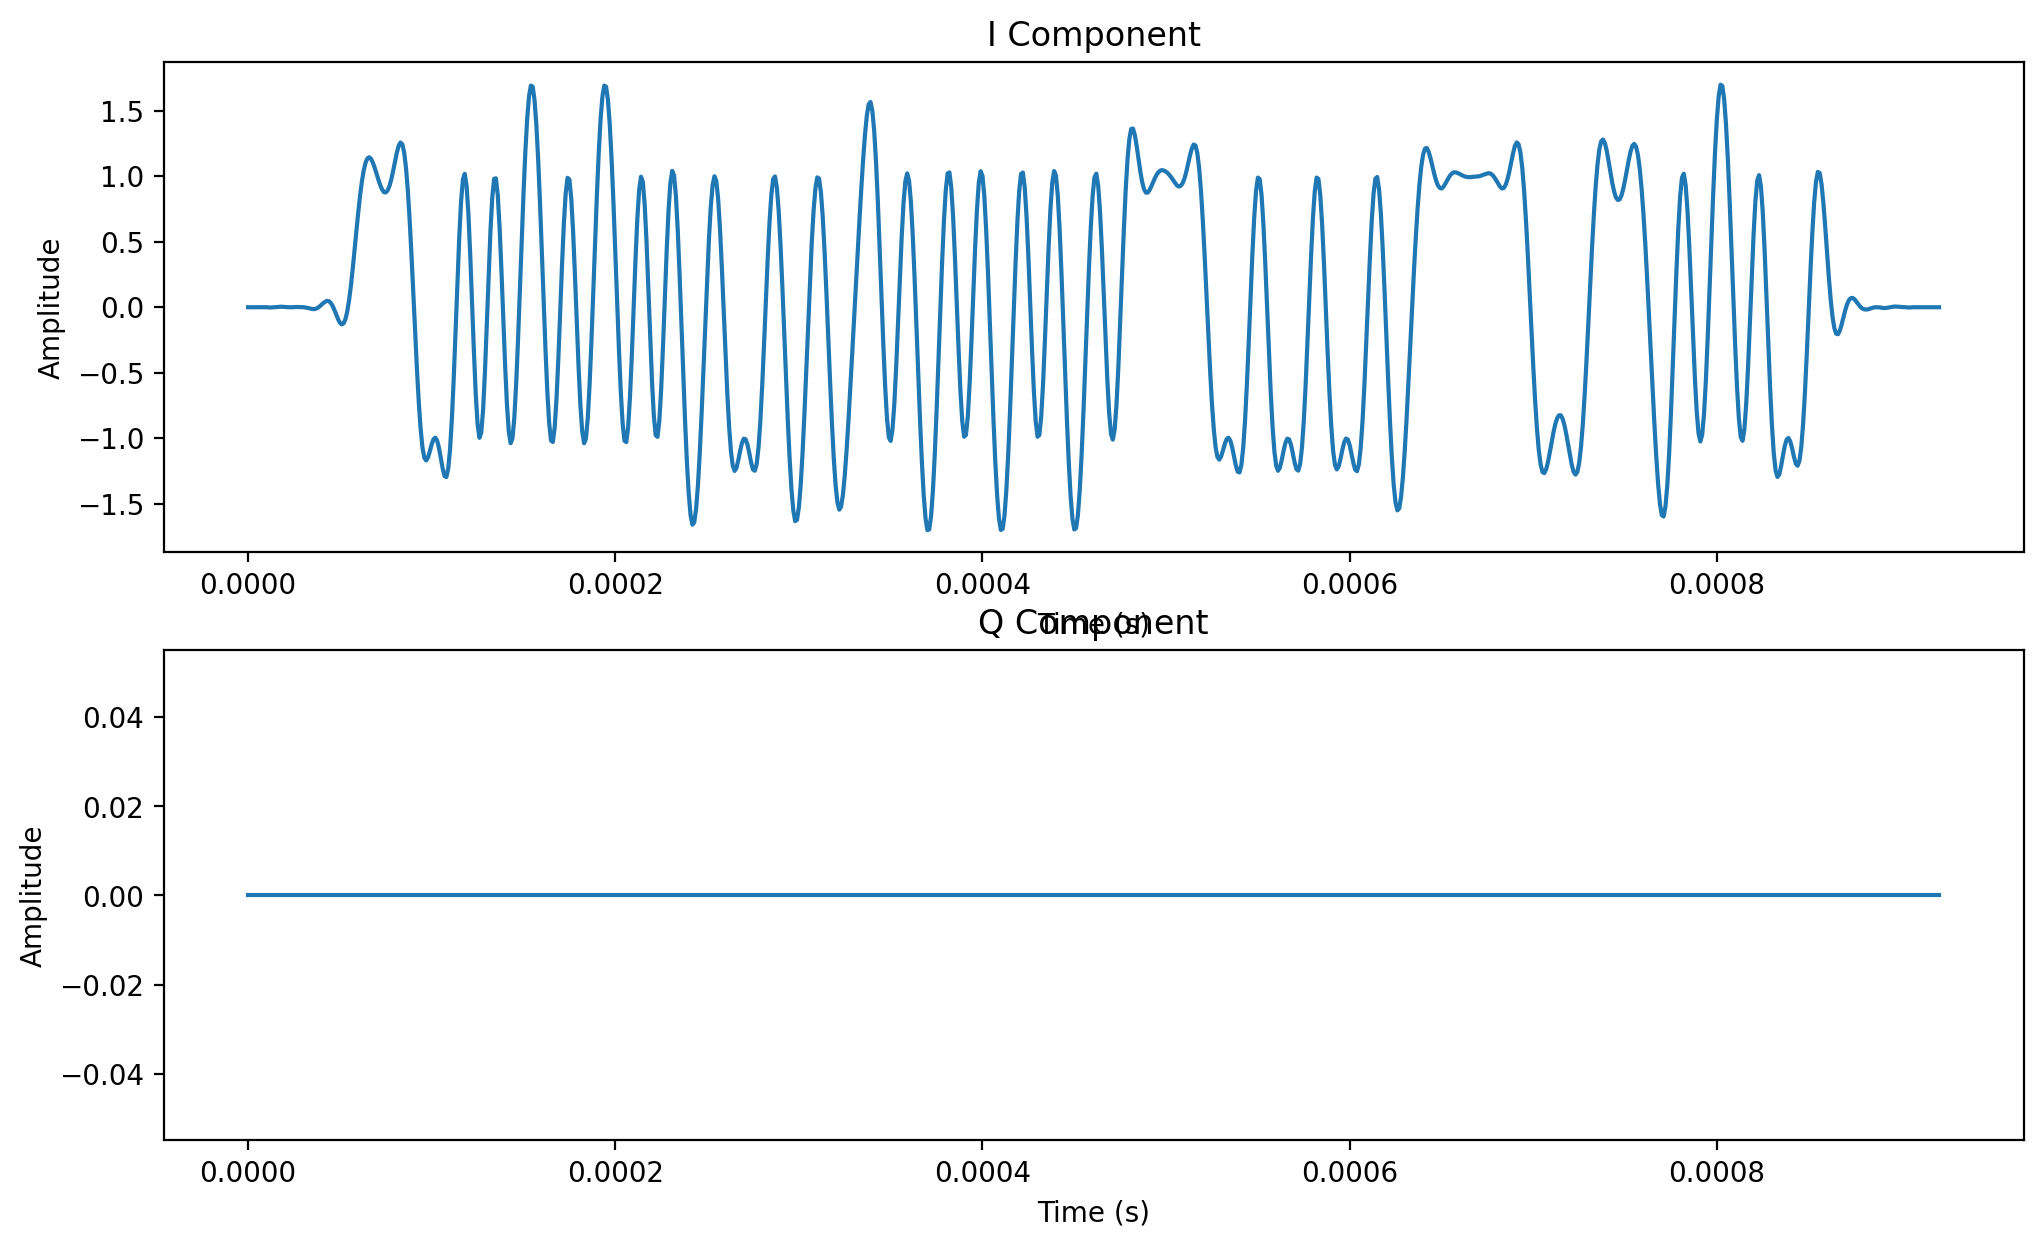

In [28]:

fs = 1e6 
fo = 13000 
Ts = 1/fs 
t = np.arange(0, Ts*len(samples_2), Ts) 
samples = samples_2 * np.exp(1j*2*np.pi*fo*t) 


# До добавления сдвига частоты 
I = np.real(samples_2)
Q = np.imag(samples_2)

# plot I and Q components
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, I)
plt.title('I Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, Q)
plt.title('Q Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


In [29]:
# create I and Q components
I = np.real(samples)
Q = np.imag(samples)

# plot I and Q components
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, I)
plt.title('I Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, Q)
plt.title('Q Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Выше показан сигнал до и после применения смещения частоты. При передаче BPSK Q-часть всегда равна нулю. Теперь, когда мы добавляем сдвиг частоты для имитации беспроводных каналов, энергия распространяется по I и Q. С этого момента мы должны строить графики как I, так и Q.

Интерполяция — это нахождение неизвестных промежуточных значений с помощью нескольких известных. В примере интерполируем на 16, т.е. мы будем вставлять 15 дополнительных сэмплов между каждой выборкой. ниже построим график до и после интерполяции, чтобы увидеть разницу.

In [25]:
samples_interpolated = signal.resample_poly(samples, 16, 1)

# Plot the old vs new
plt.figure('before interp')
plt.axis([0, 100, -2, 2])
plt.plot(samples,'.-')
plt.title("Before interpolation")
plt.figure('after interp')
plt.axis([0, 1600, -2, 2])
plt.title("After interpolation")
plt.plot(samples_interpolated,'.-')
plt.show()


Для графиков был увеличен масштаб для лучшего отображения, видно, что сигналы совпадают, только второй с в 16 раз большим количеством точек

В следующем коде Python реализован метод восстановления Мюллера и Мюллера

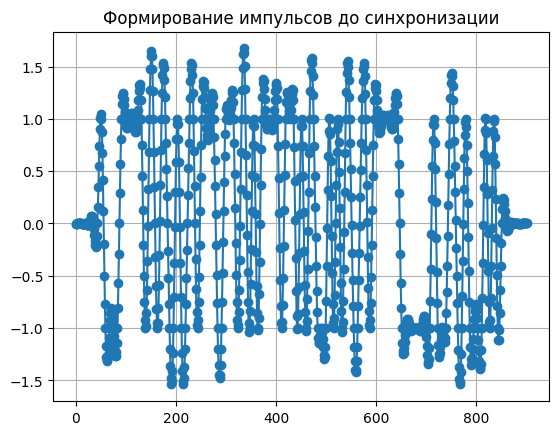

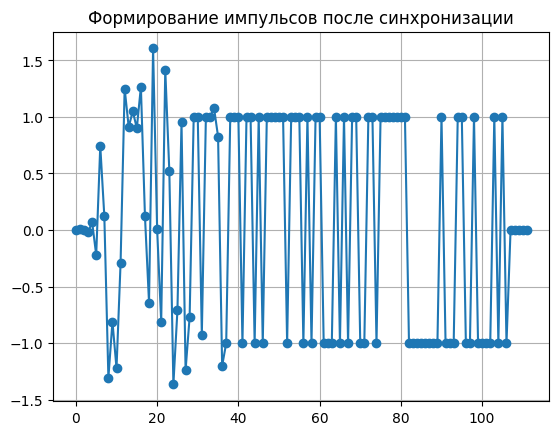

In [95]:
num_symbols = 100
sps = 8
bits = np.random.randint(0, 2, num_symbols) # Our data to be transmitted, 1's and 0's
pulse_train = np.array([])
for bit in bits:
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 # set the first value to either a 1 or -1
    pulse_train = np.concatenate((pulse_train, pulse)) # add the 8 samples to the signal

# Create our raised-cosine filter
num_taps = 101
beta = 0.35
Ts = sps # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8
t = np.arange(-51, 52) # remember it's not inclusive of final number
h = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)


# Filter our signal, in order to apply the pulse shaping
samples = np.convolve(pulse_train, h)

plt.figure('before')
plt.plot((samples), marker ='o')
plt.title("Формирование импульсов до синхронизации")
plt.grid(True)

mu = 0 # initial estimate of phase of sample
out = np.zeros(len(samples) + 10, dtype=complex)
out_rail = np.zeros(len(samples) + 10, dtype=complex) # stores values, each iteration we need the previous 2 values plus current value
i_in = 0 # input samples index
i_out = 2 # output index (let first two outputs be 0)
while i_out < len(samples) and i_in+16 < len(samples):
    out[i_out] = samples[i_in + int(mu)] # grab what we think is the "best" sample
    out_rail[i_out] = int(np.real(out[i_out]) > 0) + 1j*int(np.imag(out[i_out]) > 0)
    x = (out_rail[i_out] - out_rail[i_out-2]) * np.conj(out[i_out-1])
    y = (out[i_out] - out[i_out-2]) * np.conj(out_rail[i_out-1])
    mm_val = np.real(y - x)
    mu += sps + 0.3*mm_val
    i_in += int(np.floor(mu)) # round down to nearest int since we are using it as an index
    mu = mu - np.floor(mu) # remove the integer part of mu
    i_out += 1 # increment output index
out = out[2:i_out] # remove the first two, and anything after i_out (that was never filled out)
samples = out # only include this line if you want to connect this code snippet with the Costas Loop later on

plt.figure('after')
plt.plot((samples), marker ='o')
plt.title("Формирование импульсов после синхронизации")
plt.grid(True)



Ниже приведен код реализации петли Костаса
1. Вычисляется длина `samples` и сохраняется в переменной N.
2. Устанавливается начальная фаза в 0 и частота.
3. Устанавливаются параметры `alpha` и `beta` для настройки обратной связи.
4. Создается массив `out`, заполненный нулями.
5. Создается пустой список `freq_log`.
6. Для каждого элемента в диапазоне от 0 до N выполняются следующие действия:
   - Вычисляется значение `out[i]` путем умножения `samples[i]` на экспоненту с комплексным показателем, равным -1j*phase.
   - Вычисляется ошибка error по формуле для 2-го порядка цикла Костаса (для BPSK).
   - Обновляется частота freq и добавляется в freq_log.
   - Обновляется фаза phase.
   - Опционально: корректируется фаза, чтобы она всегда находилась в пределах от 0 до 2π, так как фаза оборачивается каждые 2π.

In [96]:

# добавим код для добавления сдвига частоты
fs = 1e6 
fo = 10000 # сдвиг частоты
Ts = 1/fs 
t = np.arange(0, Ts*len(samples), Ts) 
samples = samples * np.exp(1j*2*np.pi*fo*t) 

samples_n = samples**2 # возведение в квадрат для выделения информационного сигнала


psd = np.fft.fftshift(np.abs(np.fft.fft(samples_n)))
f = np.linspace(-fs/2.0, fs/2.0, len(psd))
max_freq = f[np.argmax(psd)]
samples = samples * np.exp(-1j*2*np.pi*max_freq*t/2.0)
plt.plot(f, psd)
plt.grid(True)
plt.title("Пик со смещением несущей")
plt.show()

N = len(samples)
phase = 0
freq =  0

alpha = 0.132
beta = 0.00932
out = np.zeros(N, dtype=complex)
freq_log = []
for i in range(N):
    out[i] = samples[i] * np.exp(-1j*phase) 
    error = np.real(out[i]) * np.imag(out[i])

    freq += (beta * error)
    freq_log.append(freq * fs / (2*np.pi)) 
    phase += freq + (alpha * error)
  
    while phase >= 2*np.pi:
        phase -= 2*np.pi
    while phase < 0:
        phase += 2*np.pi

plt.plot(freq_log,'.-')
plt.grid(True)
plt.xlabel('Sample')
plt.ylabel('Frequency offset Hz')
plt.title("Оценка смещения частоты")
plt.show()


Принцип работы петли Костаса заключается в коррекции фазы и частоты сигнала с целью улучшения его приема. В процессе работы петли Костаса входной сигнал демодулируется и оценивается его фаза и частота. Затем происходит обратная связь, которая корректирует фазу и частоту сигнала на основе полученных оценок. Это позволяет компенсировать возможные искажения сигнала, вызванные различными факторами, такими как шум, многолучевое распространение и др.
В данном случае алгоритму требуется около 70 выборок, чтобы полностью зафиксировать смещение частоты.